In [43]:
#for pandas 
import pandas as pd

#for numpy
import numpy as np

#for visualization
import matplotlib.pyplot as plt
import seaborn as sns

#this will help to keep track of iterations of gradient training
from IPython.display import clear_output

#for loading .mat extension file into program
import scipy.io as sci

In [44]:
def gz(z):
    hey=1/(1+np.exp(-z))
    return hey

In [45]:
def gz_grad(z):
    ven=gz(z)
    return (ven*(1-ven))

In [46]:
def output_submit(y,filename):
    filename=filename+".csv"
    out=[]
    ind=[]
    for i in range(0,y.shape[0]):
        hey=y[i,:].reshape(-1,1)
        out.append(np.argmax(hey))
        ind.append(i+1)
    hey=np.hstack((np.array(ind).reshape(-1,1),np.array(out).reshape(-1,1)))
    np.savetxt(filename,hey,header="ImageId,Label",delimiter=',')

In [47]:
def modify(y):
    m=y.shape[0]
    ynew=np.zeros((m,10))
    for i in range(0,m):
        ynew[i,y[i]]=1
    return ynew

In [48]:
def ini_theta1():
    theta=np.random.rand(25,785)
    return theta

The history saving thread hit an unexpected error (OperationalError('disk I/O error',)).History will not be written to the database.

In [49]:
def ini_theta2():
    theta=np.random.rand(10,26)
    return theta

In [50]:
def forw_prop(x,theta1,theta2,one=False):
    z2=x.dot(np.transpose(theta1))
    a2=gz(z2)
    a2=np.hstack((np.ones(a2.shape[0]).reshape(-1,1),a2))
    z3=a2.dot(np.transpose(theta2))
    a3=gz(z3)
    if one==False:
      return a3,z2,a2
    else:
      return a3

In [51]:
def back_prop(x,theta1,theta2,y,lambo=0):
    m=x.shape[0]
    a3,z2,a2=forw_prop(x,theta1,theta2)
    bigdelta1=np.zeros(theta1.shape)
    bigdelta2=np.zeros(theta2.shape)
    for i in range(0,y.shape[0]):
      smalldelta3=a3[i,:]-y[i,:]
      smalldelta2=(smalldelta3.dot(theta2[:,1:26]))*gz_grad(z2[i,:])
      bigdelta2=bigdelta2+np.outer(smalldelta3,a2[i,:])
      bigdelta1=bigdelta1+np.outer(smalldelta2,x[i,:])
    theta1_grad=(1/m)*bigdelta1
    theta1_grad[:,1:785]=theta1_grad[:,1:785]+(lambo/m)*(theta1[:,1:785])
    theta2_grad=(1/m)*bigdelta2
    theta2_grad[:,1:26]=theta2_grad[:,1:26]+(lambo/m)*(theta2[:,1:26])
    return theta1_grad,theta2_grad

In [52]:
def compute_cost(a3,y,lambo=0):
    m=a3.shape[0]
    hey=(1/m)*np.sum(((-y)*np.log(a3))-((1-y)*np.log(1-a3)))
    hey=hey+(lambo/(2*m))*(np.sum(theta1*theta1)+np.sum(theta2*theta2))
    return hey

In [53]:
dfl="C:/Users/Ritik/Desktop/Projects_Flash/Digit Recognizer[MNIST]/train.csv"

In [54]:
datatrain=pd.read_csv(dfl,header=0)

In [55]:
datatrain.shape

(42000, 785)

In [56]:
dfl="C:/Users/Ritik/Desktop/Projects_Flash/Digit Recognizer[MNIST]/test.csv"

In [57]:
datatest=pd.read_csv(dfl,header=0)

In [58]:
datatest.shape

(28000, 784)

In [59]:
print(datatrain.isnull().any().sum())
print(datatest.isnull().any().sum())

0
0


So there are no null or empty values in dataset(both training and testing)

In [60]:
xtrain=np.array(datatrain.iloc[:,1:])
ytrain=np.array(datatrain.iloc[:,0]).reshape(-1,1)
xtest=np.array(datatest)
print(xtrain.shape,ytrain.shape)
print(xtest.shape)

(42000, 784) (42000, 1)
(28000, 784)


In [61]:
ytrain=modify(ytrain)
print(ytrain.shape)
print(ytrain[0:5,:])

(42000, 10)
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


Divide xtrain and xtest by 255 so to bring all array element vlaues between 0 and 1
Then adding bias column to them

In [62]:
xtrain=xtrain/255
xtest=xtest/255
xtrain=np.hstack((np.ones(xtrain.shape[0]).reshape(-1,1),xtrain))
xtest=np.hstack((np.ones(xtest.shape[0]).reshape(-1,1),xtest))
print(xtrain.shape)
print(xtest.shape)

(42000, 785)
(28000, 785)


In [63]:
theta1=ini_theta1()
theta2=ini_theta2()
print(theta1.shape)
print(theta2.shape)

(25, 785)
(10, 26)


In [64]:
iterations=400
alpha=0.1
J_val=[compute_cost(forw_prop(xtrain,theta1,theta2,True),ytrain)]
ite=[i for i in range(0,iterations+1)]

In [65]:
for i in range(0,iterations):
    print(i)
    theta1_grad,theta2_grad=back_prop(xtrain,theta1,theta2,ytrain)
    theta1=theta1-(alpha/(xtrain.shape[0]))*theta1_grad
    theta2=theta2-(alpha/(xtrain.shape[0]))*theta2_grad
    clear_output()
    J_val.append(compute_cost(forw_prop(xtrain,theta1,theta2,True),ytrain))

Text(0,0.5,'Error')

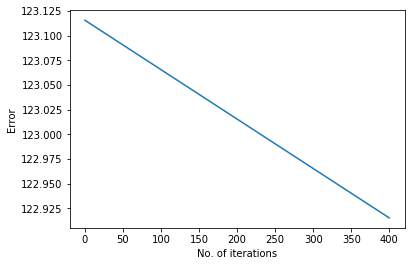

In [66]:
plt.plot(ite,J_val)
plt.xlabel("No. of iterations")
plt.ylabel("Error")

Another 400 iterations

In [69]:
iterations=400
alpha=0.1
J_val=[]
ite=[i for i in range(401,iterations+401)]

for i in range(0,iterations):
    print(i+401)
    theta1_grad,theta2_grad=back_prop(xtrain,theta1,theta2,ytrain)
    theta1=theta1-(alpha/(xtrain.shape[0]))*theta1_grad
    theta2=theta2-(alpha/(xtrain.shape[0]))*theta2_grad
    clear_output()
    J_val.append(compute_cost(forw_prop(xtrain,theta1,theta2,True),ytrain))
    
    

Text(0,0.5,'Error')

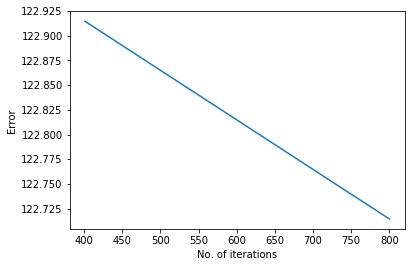

In [70]:
plt.plot(ite,J_val)
plt.xlabel("No. of iterations")
plt.ylabel("Error")

Text(0,0.5,'Error')

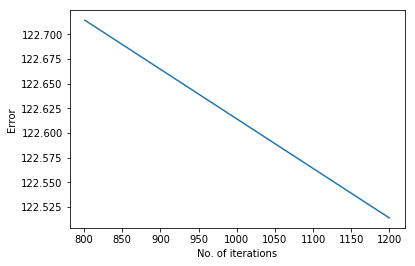

In [72]:
iterations=400
alpha=0.1
J_val=[]
ite=[i for i in range(801,iterations+801)]

for i in range(0,iterations):
    print(i+801)
    theta1_grad,theta2_grad=back_prop(xtrain,theta1,theta2,ytrain)
    theta1=theta1-(alpha/(xtrain.shape[0]))*theta1_grad
    theta2=theta2-(alpha/(xtrain.shape[0]))*theta2_grad
    clear_output()
    J_val.append(compute_cost(forw_prop(xtrain,theta1,theta2,True),ytrain))
    
plt.plot(ite,J_val)
plt.xlabel("No. of iterations")
plt.ylabel("Error")

In [73]:
a2=gz(xtest.dot(np.transpose(theta1)))
a2=np.hstack((np.ones(a2.shape[0]).reshape(-1,1),a2))
final=gz(a2.dot(np.transpose(theta2)))

In [74]:
output_submit(final,"Simple")